In [203]:
import numpy as np
import matplotlib.pyplot as plt

In [204]:
def rectangle(x=0, y=0, width=1, length=1, step=.1, cetner=False):
    if cetner:
        x = -1*int(width/2)
        y = -1*int(length/2)
    step_inv = int(1 / step)
    vertices = [(x, y), (x + width, y), (x + width, y + length), (x, y + length)]
    # Generate the points along the edges of the square
    points = []
    for i in range(len(vertices)):
        x1, y1 = vertices[i]    
        x2, y2 = vertices[(i + 1) % len(vertices)]
        if x1 == x2:  # Vertical edge        
            points.extend([(x1, y * step, 1) for y in range(min(y1, y2)*step_inv, max(y1, y2)*step_inv + 1, 1)])
        else:  # Horizontal edge        
            points.extend([(x * step, y1, 1) for x in range(min(x1, x2)*step_inv, max(x1, x2)*step_inv + 1, 1)])
    # Separate the x and y coordinates
    x_coords, y_coords, _ = zip(*points)
    return points, x_coords, y_coords


In [205]:
def isometric(points, theta=0, tx=0, ty=0, ep=1):
    theta = np.pi * theta / 180
    transform_point = []
    iso_mat = np.array([
        [ep*np.cos(theta), -1 * np.sin(theta) , tx],
        [ep*np.sin(theta), np.cos(theta), ty],
        [0, 0, 1]
    ])
    for point in points:
        transform_point.append(iso_mat @ np.array(point).T)
    x_coords, y_coords, _ = zip(*transform_point)
    return transform_point, x_coords, y_coords


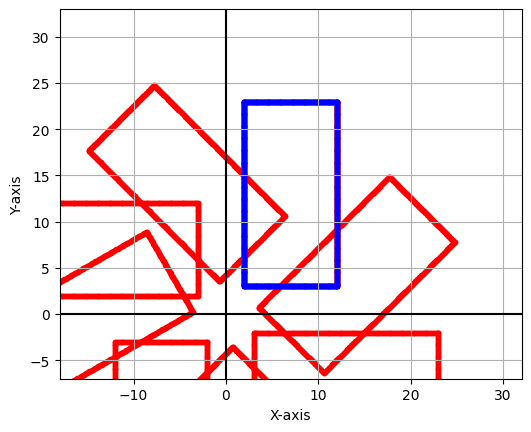

In [206]:
fig, ax = plt.subplots()

angles = [0, 45, 90, 120, 180, 225, 270, 315, 360]

points, x_coords, y_coords = rectangle(x=2, y=3, width=10, length=20, cetner=False)
for angle in angles:
    points2, x_coords2, y_coords2 = isometric(points, theta=angle, tx=0, ty=0, ep=1)
    ax.scatter(x_coords2, y_coords2, marker='.', color='r')

# Plot the points
ax.scatter(x_coords, y_coords, marker='.', color='b')
# Set the axis limits
xlim = 20
ylim = 10
ax.set_xlim(min(x_coords) - xlim, max(x_coords) + xlim)
ax.set_ylim(min(y_coords) - ylim, max(y_coords) + ylim)
# Set the axis labels
ax.set_xlabel('X-axis')
ax.set_ylabel('Y-axis')
# Display the grid
ax.grid(True)
ax.axhline(y=0, color='k')
ax.axvline(x=0, color='k')
ax.set_aspect('equal', adjustable='box')
plt.show()


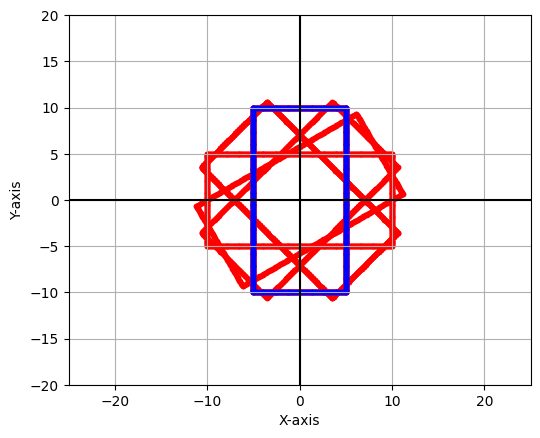

In [207]:
fig, ax = plt.subplots()

angles = [0, 45, 90, 120, 180, 225, 270, 315, 360]

points, x_coords, y_coords = rectangle(width=10, length=20, cetner=True)
for angle in angles:
    points2, x_coords2, y_coords2 = isometric(points, theta=angle, tx=0, ty=0, ep=1)
    ax.scatter(x_coords2, y_coords2, marker='.', color='r')

# Plot the points
ax.scatter(x_coords, y_coords, marker='.', color='b')
# Set the axis limits
xlim = 20
ylim = 10
ax.set_xlim(min(x_coords) - xlim, max(x_coords) + xlim)
ax.set_ylim(min(y_coords) - ylim, max(y_coords) + ylim)
# Set the axis labels
ax.set_xlabel('X-axis')
ax.set_ylabel('Y-axis')
# Display the grid
ax.grid(True)
ax.axhline(y=0, color='k')
ax.axvline(x=0, color='k')
ax.set_aspect('equal', adjustable='box')
plt.show()